## Exploratory Data Analysis



Is there any relation on Air Pollution Score and Greenhouse Gas Score by Fuel?


(0.0, 10.0)

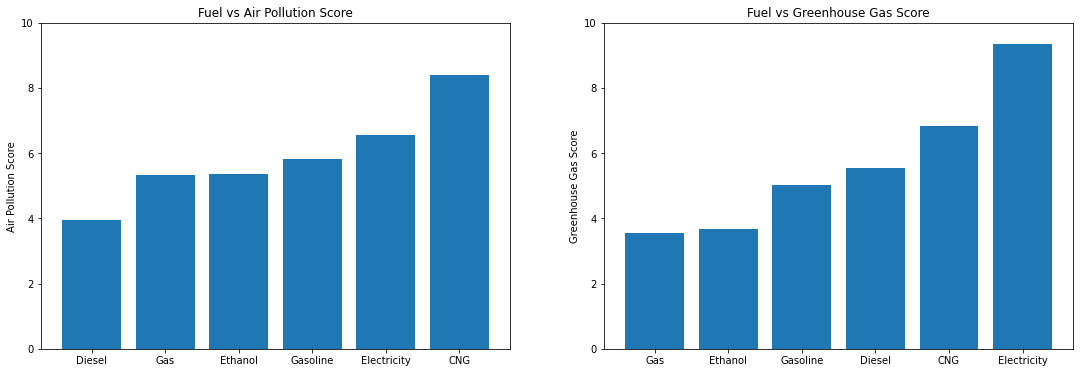

In [20]:
# Fuel vs Air Pollution Score grouping data
fuel_airpollutionscore_group = master_dataset.loc[ :, ['Fuel', 'Air Pollution Score' ]].groupby([ 'Fuel']).mean().sort_values( 'Air Pollution Score') 

# Fuel vs Greenhouse Gas Score grouping data
fuel_grgascore_group = master_dataset.loc[ : , [ 'Fuel', 'Greenhouse Gas Score' ]].groupby([ 'Fuel']).mean().sort_values('Greenhouse Gas Score')

# plot the grouped data
fig, (airpl, grgas) = plt.subplots(1,2) 
fig.set_size_inches(18.5, 6)

airpl.bar(fuel_airpollutionscore_group[ 'Air Pollution Score'].index, fuel_airpollutionscore_group['Air Pollution Score'].values) 
airpl.set_title('Fuel vs Air Pollution Score') 
airpl.set_ylabel( 'Air Pollution Score') 
airpl.set_ylim(0,10)

grgas.bar(fuel_grgascore_group[ 'Greenhouse Gas Score' ].index, fuel_grgascore_group['Greenhouse Gas Score' ].values) 
grgas.set_title('Fuel vs Greenhouse Gas Score') 
grgas.set_ylabel( 'Greenhouse Gas Score') 
grgas.set_ylim(0,10)

Is there any relation on City, Highway and combined mileage by Fuel?

(0.0, 100.0)

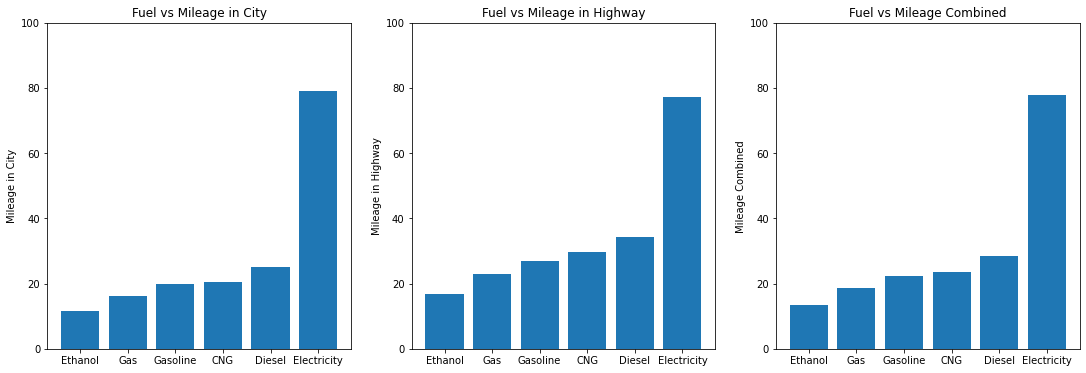

In [21]:
# Fuel vs Mileage in City grouping data
fuel_citympg_group = master_dataset.loc[ :, [ 'Fuel', 'City MPG' ]].groupby (['Fuel']).mean().sort_values ( 'City MPG' ) 

# Fuel vs Mileage in Highway grouping data
fuel_hwympg_group = master_dataset.loc[:, [ 'Fuel', 'Hwy MPG' ]].groupby([ 'Fuel']).mean().sort_values ('Hwy MPG') 

# Fuel vs Mileage in Combined grouping data
fuel_cmbmpg_group = master_dataset.loc[ :, [ 'Fuel', 'Cmb MPG' ]].groupby([ 'Fuel']).mean().sort_values ( 'Cmb MPG' ) 
 
    
# plot the grouped data
fig, (citympg, hwympg, commpg) = plt.subplots (1,3) 
fig.set_size_inches(18.5,6)

citympg.bar(fuel_citympg_group[ 'City MPG'].index, fuel_citympg_group[ 'City MPG'].values) 
citympg.set_title( 'Fuel vs Mileage in City') 
citympg.set_ylabel ( 'Mileage in City' ) 
citympg.set_ylim(0,100)

hwympg.bar (fuel_hwympg_group[ 'Hwy MPG' ].index, fuel_hwympg_group[ 'Hwy MPG' ].values) 
hwympg.set_title('Fuel vs Mileage in Highway' ) 
hwympg.set_ylabel( 'Mileage in Highway' ) 
hwympg.set_ylim(0,100)

commpg.bar (fuel_cmbmpg_group[ 'Cmb MPG' ].index, fuel_cmbmpg_group[ 'Cmb MPG' ].values) 
commpg.set_title('Fuel vs Mileage Combined') 
commpg.set_ylabel ( 'Mileage Combined' ) 
commpg.set_ylim(0,100)

Are more unique models using alternative fuels in 2018 compared to 2017? By how much?

In [23]:
dataset2018 = master_dataset[master_dataset.loc[:, 'Year' ] == 2018] 
grouped_model_fuel = pd.DataFrame(dataset2018.groupby([ 'Model', 'Fuel']).count().index.values.tolist()) 
grouped_model_fuel.groupby([0]).count().values.mean() 
print('Average number of different fuels used by Model in 2018: ',grouped_model_fuel.groupby([0]).count().values.mean( ) )

datasettemp = master_dataset[master_dataset.loc[:, 'Year' ] == 2017] 
grouped_model_fuel = pd.DataFrame(datasettemp.groupby([ 'Model', 'Fuel']).count().index.values.tolist( )) 
grouped_model_fuel.groupby([0]).count().values.mean() 
print('Average number of different fuels used by Model in 2017: ', grouped_model_fuel.groupby([0]).count().values.mean())

print('---------------------------------')
print('More alternative fuels are being used in 2018 compared to 2017')

Average number of different fuels used by Model in 2018:  1.1537242472266245
Average number of different fuels used by Model in 2017:  1.144278606965174
---------------------------------
More alternative fuels are being used in 2018 compared to 2017


How much have vehicle classes improved in fuel economy (increased in mpg) per year?

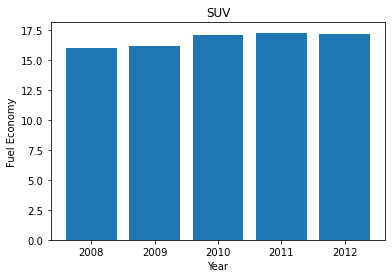

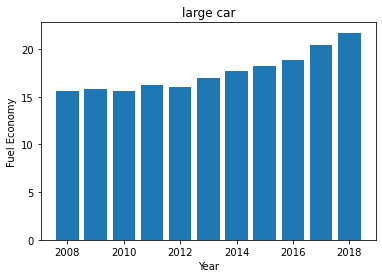

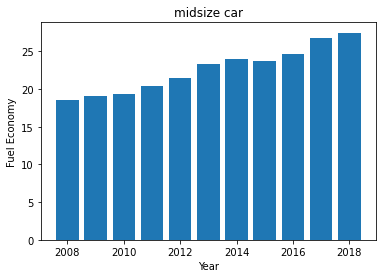

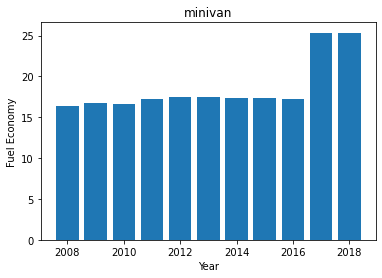

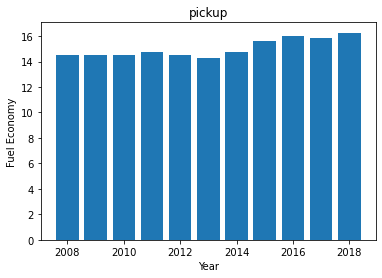

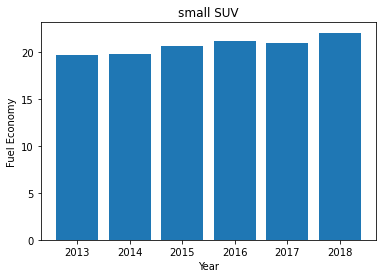

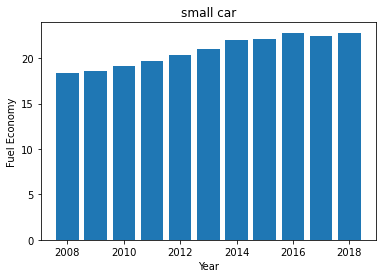

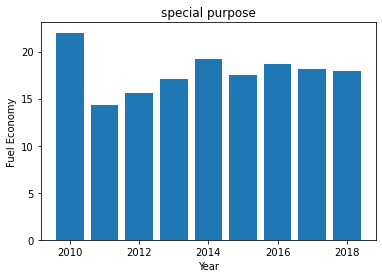

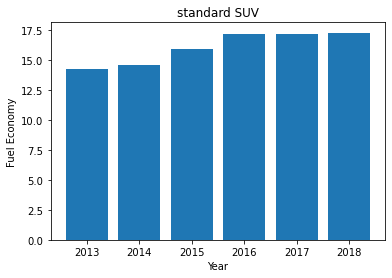

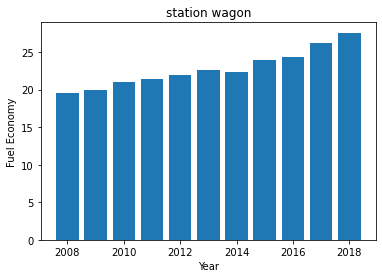

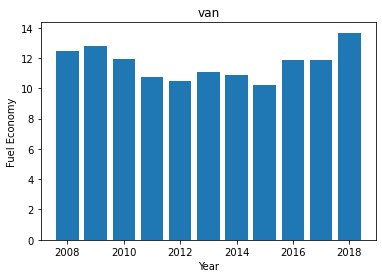

In [24]:
# group different class of vehicles by year
grouped_fueleconomy_year = pd.DataFrame(master_dataset.loc[:,[ 'Veh Class', 'City MPG', 'Year']].groupby ([ 'Veh Class', 'Year' ]).mean().index.tolist()) 
grouped_fueleconomy_year[2] = pd.DataFrame(master_dataset.loc[ : , [ 'Veh Class', 'City MPG', 'Year']].groupby([ 'Veh Class', 'Year' ]).mean( ).values.tolist( )) 
grouped_fueleconomy_year.columns = [ 'Veh Class', 'Year', 'Avg City MPG' ]

# plot for each class of vehicle
for i in grouped_fueleconomy_year.loc[ :, 'Veh Class' ].unique( ):
    data = grouped_fueleconomy_year [grouped_fueleconomy_year.loc[ : , 'Veh Class' ] == i] 
    plt.bar(data.loc[:, 'Year' ], data. loc[ : , 'Avg City MPG' ]) 
    plt.title(i) 
    plt.xlabel('Year') 
    plt.ylabel('Fuel Economy') 
    plt.show()


What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

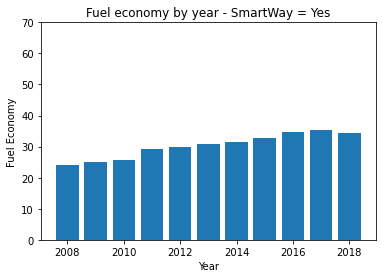

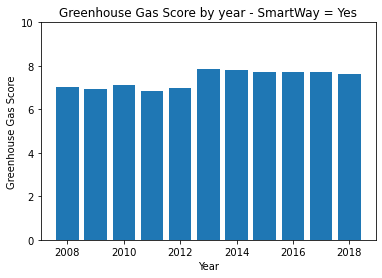

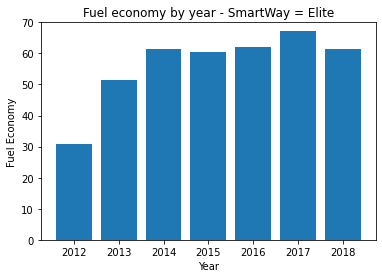

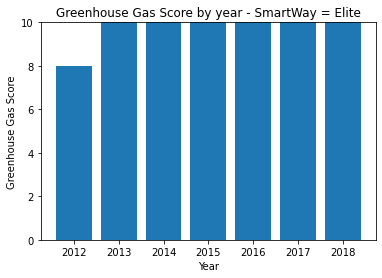

In [25]:
# group smartway vehicles on fuel economy, green house gas score by year

# Fuel economy by year - SmartWay = Yes
grouped_smartway_yes_year = pd.DataFrame(master_dataset[master_dataset.loc[ :, 'SmartWay' ] == 'Yes'].loc[ : , [ 'Cmb MPG', 'Greenhouse Gas Score', 'Year' ]].groupby ([ 'Year' ]).mean().values.tolist()) 

# Greenhouse Gas Score by year - SmartWay = Yes
grouped_smartway_yes_year.index = master_dataset[master_dataset.loc[ :, 'SmartWay'] == 'Yes' ].loc[ : , [ 'Cmb MPG', 'Greenhouse Gas Score', 'Year' ]].groupby([ 'Year' ]).mean().index 

# Fuel economy by year - SmartWay = Elite
grouped_smartway_elite_year = pd.DataFrame(master_dataset[master_dataset.loc[ : , 'SmartWay' ] =='Elite' ].loc[ : , [ 'Cmb MPG' , 'Greenhouse Gas Score', 'Year' ]].groupby([ 'Year' ]).mean().values.tolist( )) 

# Greenhouse Gas Score by year - SmartWay = Elite
grouped_smartway_elite_year.index = master_dataset[master_dataset. loc[:, 'SmartWay'] == 'Elite' ].loc[ : , [ 'Cmb MPG', 'Greenhouse Gas Score' , 'Year' ]].groupby([ 'Year' ]).mean( ).index

# plot the grouped data
plt.bar (grouped_smartway_yes_year.index, grouped_smartway_yes_year.loc[ : , 0]) 
plt.title( 'Fuel economy by year - SmartWay = Yes' ) 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Fuel Economy' ) 
plt.ylim(0,70) 
plt.show()

plt.bar(grouped_smartway_yes_year.index, grouped_smartway_yes_year.loc[ : , 1]) 
plt.title( 'Greenhouse Gas Score by year - SmartWay = Yes') 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Greenhouse Gas Score' ) 
plt.ylim(0,10) 
plt.show()

plt.bar(grouped_smartway_elite_year.index, grouped_smartway_elite_year.loc[ : ,0]) 
plt.title( 'Fuel economy by year - SmartWay = Elite' ) 
plt.xlabel( 'Year') 
plt.ylabel('Fuel Economy' ) 
plt.ylim(0,70) 
plt.show()

plt.bar(grouped_smartway_elite_year.index, grouped_smartway_elite_year.loc[:,1]) 
plt.title( 'Greenhouse Gas Score by year - SmartWay = Elite' ) 
plt.xlabel('Year' ) 
plt.ylabel( 'Greenhouse Gas Score' ) 
plt.ylim(0,10) 
plt.show( )


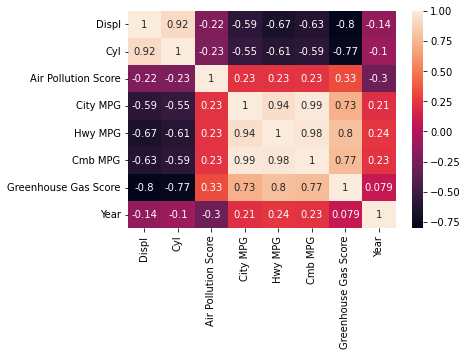

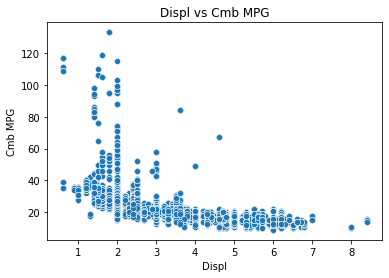

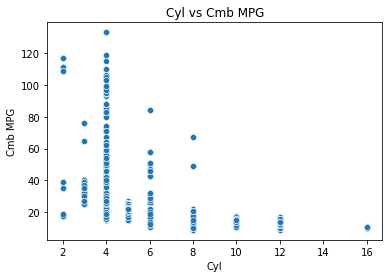

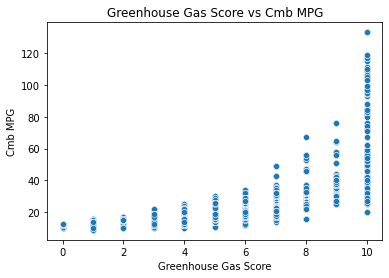

In [26]:
# What features are associated with better fuel economy (mpg)

#ploting the heatmap for correlation 
sns.heatmap(master_dataset.corr(), annot=True)
plt.show()

# From the Heatmap, we can see that Displacement and Cylinders have a high negative correlation with Combined MPG, 
# which implies that lower the Displacement and Cylinders, higher the fuel economy.
# Green gas house score has a positive correlation.

sns.scatterplot(x = 'Displ', y = 'Cmb MPG', data = master_dataset)
plt.title('Displ vs Cmb MPG')
plt.show()

sns.scatterplot(x = 'Cyl', y = 'Cmb MPG', data = master_dataset)
plt.title('Cyl vs Cmb MPG')
plt.show()

sns.scatterplot(x = 'Greenhouse Gas Score', y = 'Cmb MPG', data = master_dataset)
plt.title('Greenhouse Gas Score vs Cmb MPG')
plt.show()


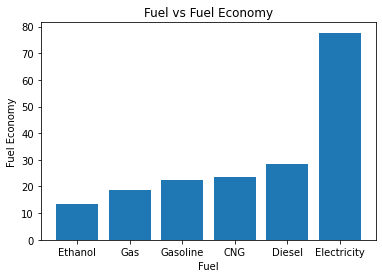

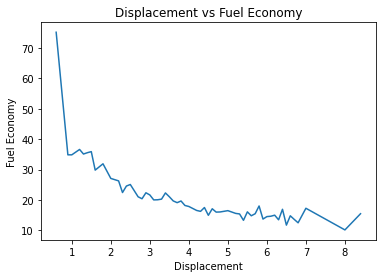

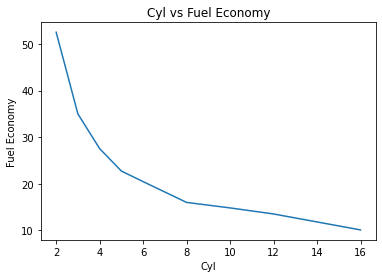

In [28]:
# Fuel vs Fuel Economy 
fuel_Cmbmpg_group = pd.DataFrame(master_dataset.loc[:, [ 'Fuel', 'Cmb MPG']].groupby([ 'Fuel']).mean().sort_values( 'Cmb MPG' ).values.tolist()) 
fuel_Cmbmpg_group.index = master_dataset.loc[:, [ 'Fuel', 'Cmb MPG' ]].groupby([ 'Fuel' ]).mean().sort_values( 'Cmb MPG' ).index.values 
plt.bar(fuel_Cmbmpg_group.index, fuel_Cmbmpg_group.loc[:,0]) 
plt.title('Fuel vs Fuel Economy' ) 
plt.xlabel( 'Fuel') 
plt.ylabel('Fuel Economy' ) 
plt.show()

# Displacement vs Fuel Economy 
displ_Cmbmpg_group = pd.DataFrame(master_dataset. loc[ :, [ 'Displ', 'Cmb MPG']].groupby([ 'Displ']).mean().sort_values ( 'Displ').values.tolist()) 
displ_Cmbmpg_group.index = master_dataset.loc[ :, [ 'Displ', 'Cmb MPG' ]].groupby([ 'Displ']).mean().sort_values( 'Displ').index.values 
plt.plot(displ_Cmbmpg_group.index, displ_Cmbmpg_group.loc[ : ,0])
plt.title('Displacement vs Fuel Economy' ) 
plt.xlabel( 'Displacement') 
plt.ylabel('Fuel Economy' ) 
plt. show()

# Number of Cylinders vs Fuel Economy
cyl_Cmbmpg_group = pd.DataFrame(master_dataset.loc[ : , [ 'Cyl', 'Cmb MPG' ]].groupby([ 'Cyl']).mean().sort_values ( 'Cyl' ).values.tolist( )) 
cyl_Cmbmpg_group.index = master_dataset.loc[ : , [ 'Cyl', 'Cmb MPG' ]].groupby([ 'Cyl' ]).mean().sort_values( 'Cyl').index.values 
plt.plot(cyl_Cmbmpg_group.index, cyl_Cmbmpg_group.loc[ : , 0]) 
plt.title( 'Cyl vs Fuel Economy' ) 
plt.xlabel( 'Cyl') 
plt.ylabel( 'Fuel Economy' ) 
plt. show()